# Predicting Scores from Students 

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [91]:
url ='http://bit.ly/w-data'
data= pd.read_csv(url)

In [92]:
print("The dimension of data :{}".format(data.shape))

The dimension of data :(25, 2)


In [93]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The data contains of 2 columns; Hours and Scores. 

## Let us Visualize the Data using Correlation Plot.

Text(0.5, 1.0, 'Correlation Plot')

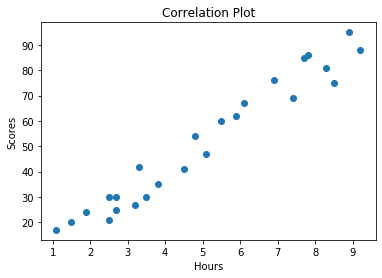

In [94]:
plt.scatter(data["Hours"],data["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Correlation Plot")

From the scatter plot we can see the direction of relationship between studying hours and scores obtained. There is a positive relation between hours and scores.

Split the data into feature and target variable. Here Hours is a feature and Scores is target variable, since we want to predict the scores. 

In [97]:
X=data.iloc[:,:1].values
y=data.iloc[:,-1].values

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Linear Regression
We Will use linear regression algorithm to predict the scores.

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
print(lr.intercept_)
print(lr.coef_)

2.018160041434683
[9.91065648]


## Prediction on Test Set
We will apply the algorithm trained on test set.

In [101]:
y_pred=lr.predict(X_test)

In [102]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

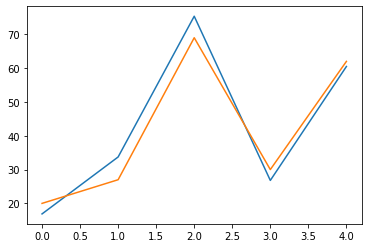

In [103]:
plt.plot(y_pred)
plt.plot(y_test)

From this we can see that the predicted and actual scores are not much varying.

In [104]:
compare=pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


 ## Let us Predict!!!
We can predict the scores for hours we have studied. For suppose let us check for student who has studied for 9.25 hours. Whatwill be his scores??

In [105]:
hours = [[9.25]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Evaluating the Model
At end we need to check the performance of our model. We have used Mean Absolute Error for the same.

In [106]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
